# FIFA 선수 이적료 예측 경진대회

- https://dacon.io/competitions/open/235538/overview/description
- 평가 산식 : RMSE
- 공공 데이터와 같이 누구나 얻을 수 있고 법적 제약이 없는 외부 데이터 허용

```plaintext

1. FIFA_train.csv / FIFA_test.csv
 id : 선수 고유의 아이디
 name : 이름
 age : 나이
 continent : 선수들의 국적이 포함되어 있는 대륙입니다
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
 stat_overall : 선수의 현재 능력치 입니다.
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다


2. submission.csv (제출 파일 형식)
id : 선수 고유의 아이디
value : 예측된 선수 이적 시장 가격을 기입 
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Data/FIFA/FIFA_train.csv", index_col="id")
train

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,,,,,,,,,,,
0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8932 entries, 0 to 16948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8932 non-null   object 
 1   age               8932 non-null   int64  
 2   continent         8932 non-null   object 
 3   contract_until    8932 non-null   object 
 4   position          8932 non-null   object 
 5   prefer_foot       8932 non-null   object 
 6   reputation        8932 non-null   float64
 7   stat_overall      8932 non-null   int64  
 8   stat_potential    8932 non-null   int64  
 9   stat_skill_moves  8932 non-null   float64
 10  value             8932 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 837.4+ KB


In [4]:
train.nunique()

name                8932
age                   25
continent              5
contract_until        17
position               4
prefer_foot            2
reputation             5
stat_overall          46
stat_potential        45
stat_skill_moves       5
value                198
dtype: int64

In [5]:
test = pd.read_csv("Data/FIFA/FIFA_test.csv", index_col="id")
test

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
id,,,,,,,,,,
1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...
16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0


In [6]:
test.nunique()

name                3828
age                   26
continent              5
contract_until        18
position               4
prefer_foot            2
reputation             5
stat_overall          47
stat_potential        43
stat_skill_moves       5
dtype: int64

## 히스토그램

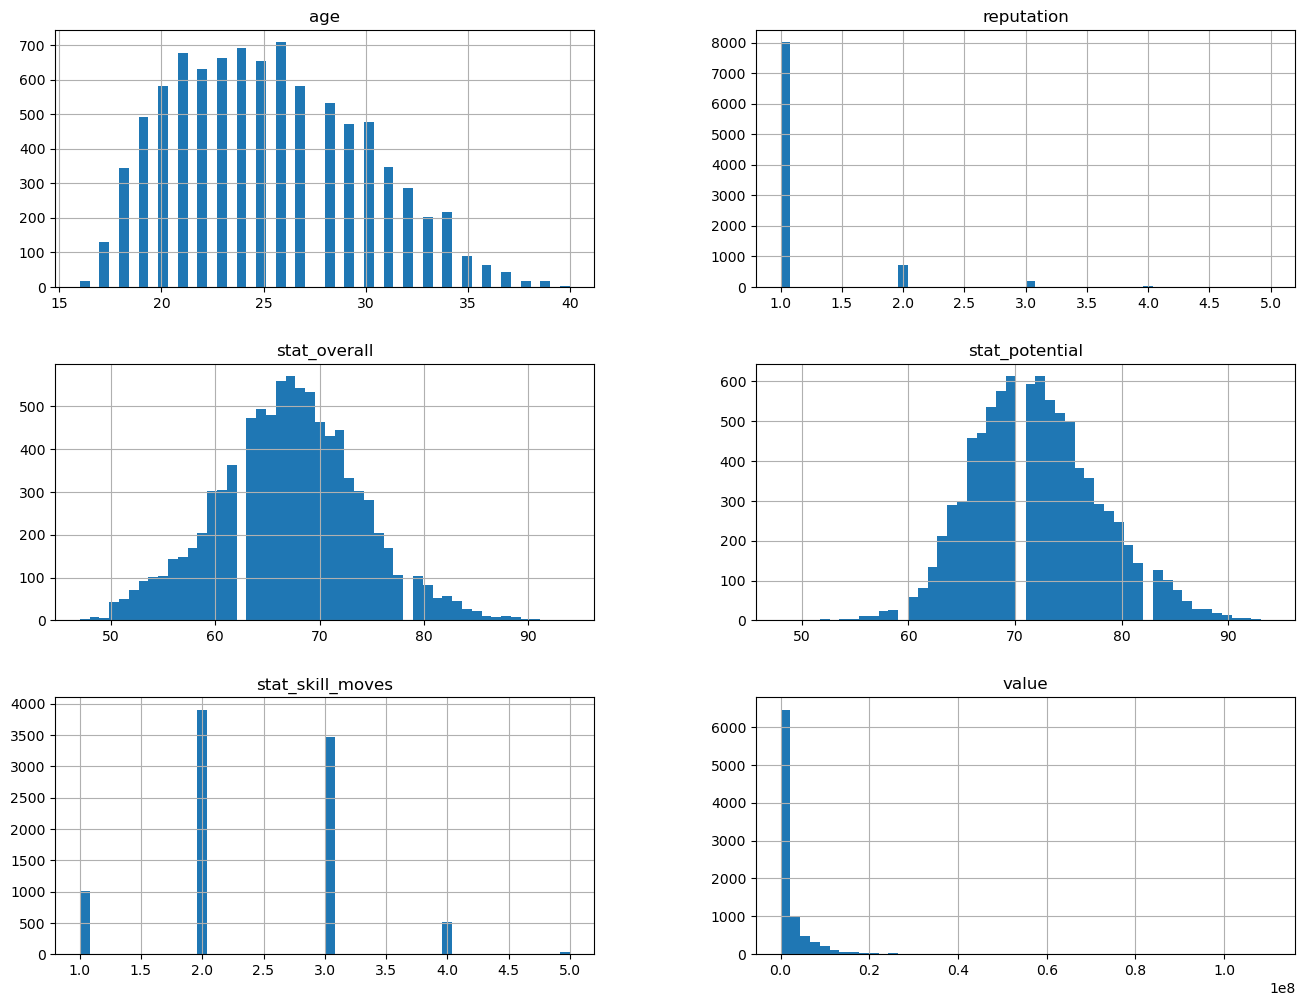

In [7]:
_ = train.hist(figsize=(16,12), bins=50)

- reputation(유명한정도), stat_skill_moves(개인기능력치) 는 범주형처럼 보인다.
    하지만 숫자 크기게 의미가 있는 범주형 데이터이기 때문에, 범주형 타입으로 바꾸지 않아도 될것같다.

- stat_overall(현재능력치) 과 stat_potential(발전가능정도)는 연속형 데이터인데 중간에 빈 공간이 보인다. 왜그런걸까???

- 예측 대상 값인 value 가 너무 왼쪽으로 치우쳐져 있다. log 를 트랜스폼을 통해서 정규분포 모양으로 바꾼 다음에 예측을 해보자!

- 각 feature와 value 값을 scatter plot 으로 그려보고 싶다. 

In [8]:
# value 의 왜도
train["value"].skew()

5.885798215027292

In [9]:
# value 의 최소값이 10000 이어서 log1p 를 사용하지 않았다. 
train["value_log"] = np.log(train["value"])

In [10]:
# log transform 을 한 값의 왜도
train["value_log"].skew()

0.30879060047375656

### 기술통계

In [11]:
train.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03,8932.000000
mean,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06,13.793899
std,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06,1.401711
min,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04,9.210340
25%,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05,12.834681
50%,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05,13.623139
75%,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06,14.771022
max,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08,18.520526


In [12]:
train.describe(include="object")

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


## 시각화

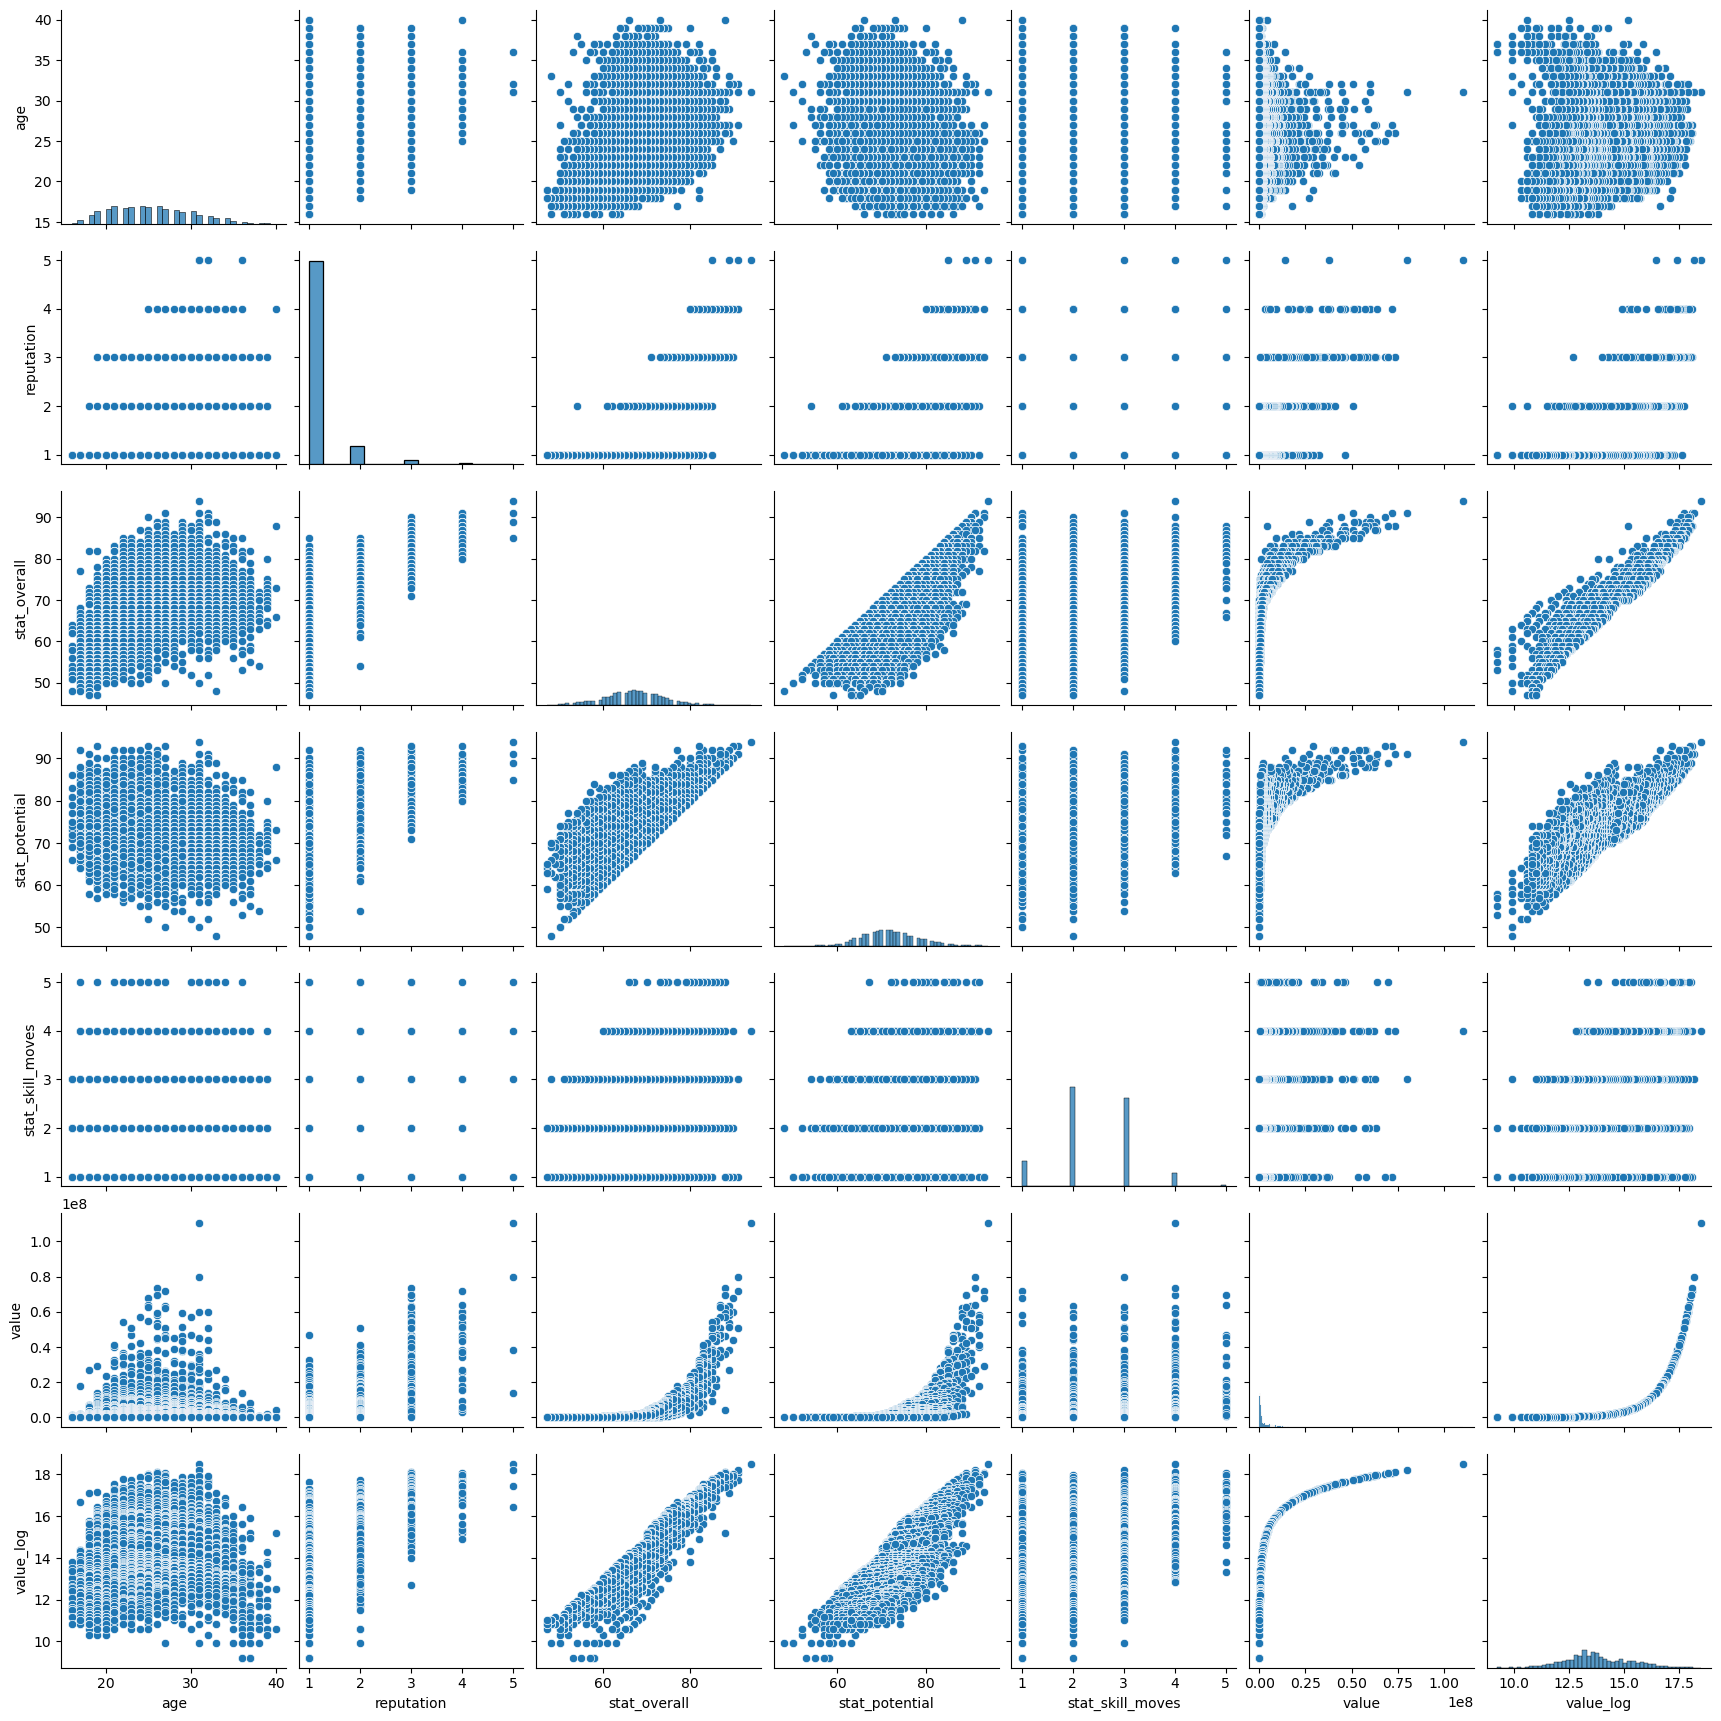

In [13]:
sns.pairplot(train)

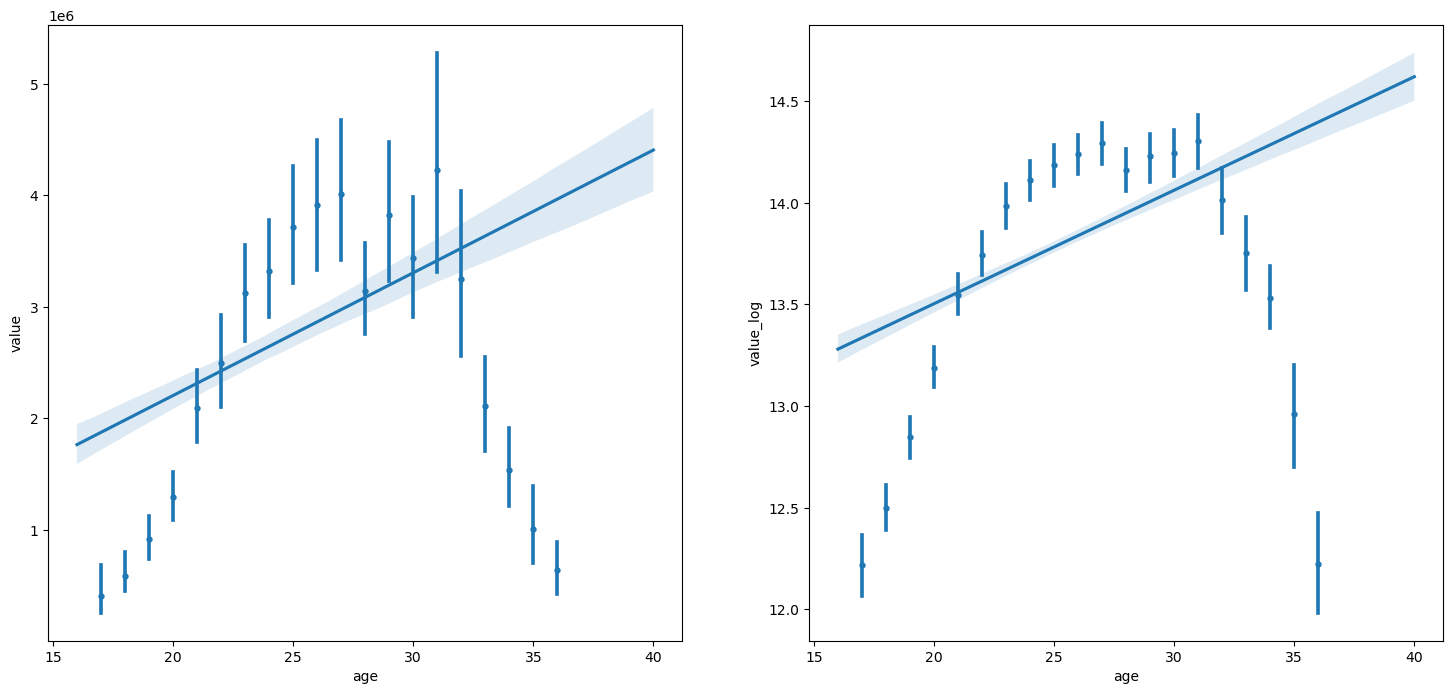

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
_ = sns.regplot(data=train, x="age", y="value", marker=".", x_bins=100, ax=axes[0])
_ = sns.regplot(data=train, x="age", y="value_log", marker=".", x_bins=100, ax=axes[1])

In [15]:
train["reputation"].value_counts()

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64

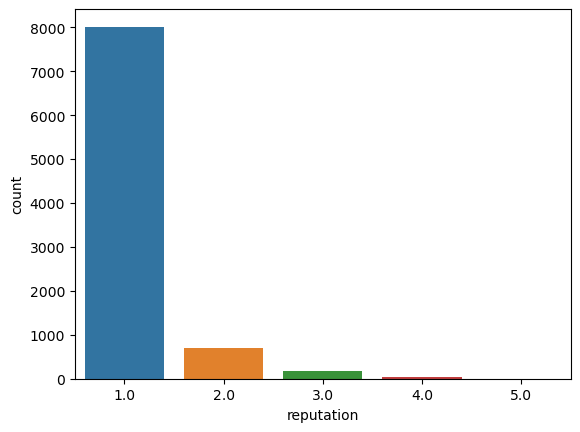

In [16]:
_ = sns.countplot(data=train, x="reputation")

### 나이별 시각화

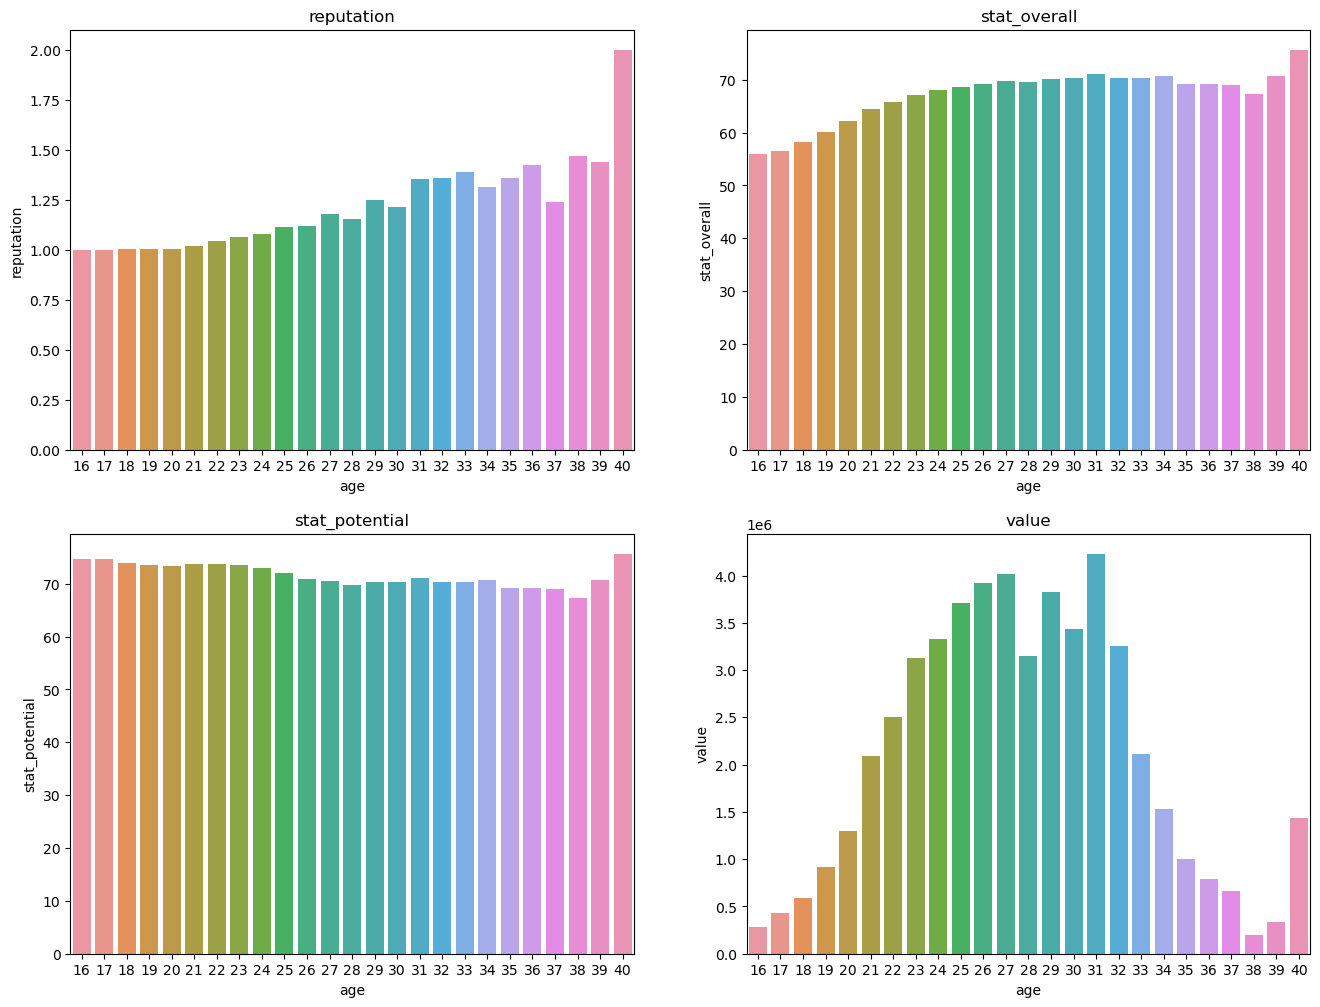

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
_ = sns.barplot(data=train, x="age", y="reputation", errorbar=None, ax=axes[0][0]).set_title("reputation")
_ = sns.barplot(data=train, x="age", y="stat_overall", errorbar=None, ax=axes[0][1]).set_title("stat_overall")
_ = sns.barplot(data=train, x="age", y="stat_potential", errorbar=None, ax=axes[1][0]).set_title("stat_potential")
_ = sns.barplot(data=train, x="age", y="value", errorbar=None, ax=axes[1][1]).set_title("value")

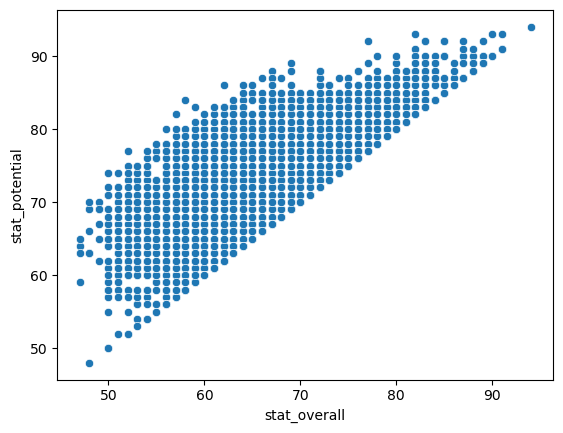

In [18]:
_ = sns.scatterplot(data=train, x="stat_overall", y="stat_potential")

In [19]:
(train["stat_potential"] - train["stat_overall"]).describe()

count    8932.000000
mean        4.906068
std         5.311906
min         0.000000
25%         0.000000
50%         3.000000
75%         8.000000
max        26.000000
dtype: float64

- 발전 가능 정도와 현재 능력치의 차이를 파생변수로 만들어주기

In [20]:
train["stat_diff"] = train["stat_potential"] - train["stat_overall"]
test["stat_diff"] = test["stat_potential"] - test["stat_overall"]

### 명목형데이터

In [21]:
train.select_dtypes(include="object")

,name,continent,contract_until,position,prefer_foot
id,,,,,
0,L. Messi,south america,2021,ST,left
3,De Gea,europe,2020,GK,right
7,L. Suárez,south america,2021,ST,right
8,Sergio Ramos,europe,2020,DF,right
9,J. Oblak,europe,2021,GK,right
...,...,...,...,...,...
16925,S. Adewusi,africa,2019,MF,right
16936,C. Ehlich,europe,2020,DF,right
16941,N. Fuentes,south america,2021,DF,right


- name 은 feature 에서 빼는게 좋을것 같다. 


### contract_until 은 수치형으로 바꿔도 될거 같은데?

In [22]:
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [23]:
train["contract_year"] = train["contract_until"]
contract_year = train.loc[train["contract_year"].str.contains(",")]["contract_year"]
train.loc[train["contract_year"].str.contains(","), "contract_year"] = contract_year.map(lambda x : x.split(",")[1].strip())
train["contract_year"] = train["contract_year"].astype(int)

train[["contract_until", "contract_year"]].loc[train["contract_until"].str.contains(",")]

,contract_until,contract_year
id,,
38,"Jun 30, 2019",2019
166,"Dec 31, 2018",2018
176,"Jun 30, 2019",2019
332,"Jun 30, 2019",2019
354,"Jun 30, 2019",2019
...,...,...
16257,"Jun 30, 2019",2019
16265,"Jun 30, 2019",2019
16310,"Jun 30, 2019",2019


In [24]:
test["contract_year"] = test["contract_until"]
contract_year = test.loc[test["contract_year"].str.contains(",")]["contract_year"]
test.loc[test["contract_year"].str.contains(","), "contract_year"] = contract_year.map(lambda x : x.split(",")[1].strip())
test["contract_year"] = test["contract_year"].astype(int)

test[["contract_until", "contract_year"]].loc[test["contract_until"].str.contains(",")]

,contract_until,contract_year
id,,
28,"Jun 30, 2019",2019
91,"Jun 30, 2019",2019
427,"Jun 30, 2019",2019
444,"Jun 30, 2019",2019
564,"Jun 30, 2019",2019
...,...,...
15392,"Jun 30, 2019",2019
15393,"Jun 30, 2019",2019
15504,"Jun 30, 2019",2019


### 상관계수와 heatmap

In [25]:
train_corr = train.corr()
train_corr

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,stat_diff,contract_year
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,0.184635,-0.863849,-0.132052
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.480682,-0.222840,0.070446
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.938548,-0.540310,0.156983
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.793474,0.268552,0.258477
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.476796,-0.141486,0.082641
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.694398,-0.159902,0.228638
value_log,0.184635,0.480682,0.938548,0.793474,0.476796,0.694398,1.000000,-0.316690,0.214344
stat_diff,-0.863849,-0.222840,-0.540310,0.268552,-0.141486,-0.159902,-0.316690,1.000000,0.088799
contract_year,-0.132052,0.070446,0.156983,0.258477,0.082641,0.228638,0.214344,0.088799,1.000000


<AxesSubplot:>

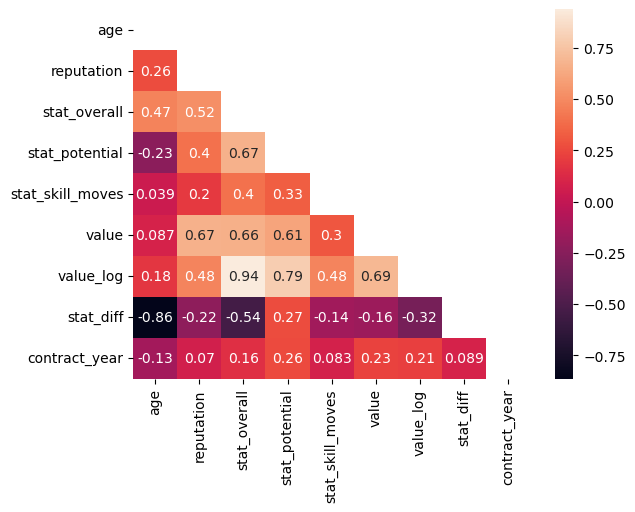

In [26]:
mask = np.triu(np.ones_like(train_corr))
sns.heatmap(train_corr, annot=True, mask=mask)

### 원핫인코딩

In [27]:
train.select_dtypes(include="object").columns

Index(['name', 'continent', 'contract_until', 'position', 'prefer_foot'], dtype='object')

In [28]:
train.select_dtypes(include="number").columns

Index(['age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value', 'value_log', 'stat_diff', 'contract_year'],
      dtype='object')

In [29]:
label_name = "value_log"
feature_name= ['age', 'reputation', 'stat_overall', 'stat_potential'
               ,'stat_skill_moves', 'stat_diff', 'contract_year'
               ,'continent', 'position', 'prefer_foot']

In [34]:
y_train = train[label_name]
y_train.shape

(8932,)

In [31]:
X_train = pd.get_dummies(train[feature_name], drop_first=True)
X_train.shape

(8932, 15)

In [32]:
X_test =  pd.get_dummies(test[feature_name], drop_first=True)
X_test.shape

(3828, 15)

# RandomForest ML

In [37]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor(n_jobs=-1, random_state=42)

### cross validation

In [38]:
from sklearn.model_selection import cross_val_predict

y_valid = cross_val_predict(random_model, X_train, y_train, n_jobs=-1, cv=5)
y_valid[:5]

array([15.54938328, 15.35723982, 15.5266505 , 15.44209601, 15.36453158])

In [43]:
# rmse
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_valid)**0.5
rmse

0.6106850328048408

In [42]:
(((y_train - y_valid)**2).mean())**0.5

0.6106850328048403

### random search

In [78]:
param_distributions = {"max_depth":np.random.randint(5, 20, 10)
                      , "max_features":np.random.rand(10)}
param_distributions

{'max_depth': array([11, 14, 12, 15, 18, 10,  7, 17, 11, 10]),
 'max_features': array([0.96392411, 0.33037283, 0.59308543, 0.3227067 , 0.12899079,
        0.55091537, 0.18407997, 0.233547  , 0.70856562, 0.72062066])}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(random_model, n_jobs=-1, param_distributions = param_distributions, scoring="neg_mean_squared_error")

In [80]:
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([11, 14, 12, 15, 18, 10,  7, 17, 11, 10]),
                                        'max_features': array([0.96392411, 0.33037283, 0.59308543, 0.3227067 , 0.12899079,
       0.55091537, 0.18407997, 0.233547  , 0.70856562, 0.72062066])},
                   scoring='neg_mean_squared_error')

In [81]:
print("best params : ", clf.best_params_)
print("best score : ", (-clf.best_score_)**0.5)

best params :  {'max_features': 0.9639241078609957, 'max_depth': 14}
best score :  0.6090186840140913


In [82]:
best_model = clf.best_estimator_
best_model

RandomForestRegressor(max_depth=14, max_features=0.9639241078609957, n_jobs=-1,
                      random_state=42)

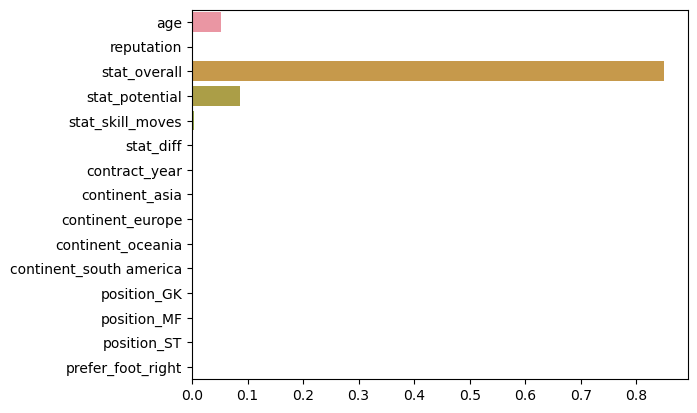

In [249]:
_ = sns.barplot(x=clf.best_estimator_.feature_importances_, y=clf.best_estimator_.feature_names_in_)

## 제출해보기

In [91]:
pd.options.display.float_format = '{:.5f}'.format

In [83]:
y_predict = best_model.fit(X_train, y_train).predict(X_test)
y_predict

array([17.75353311, 18.17367117, 18.00523211, ..., 10.96212206,
       10.73714308, 10.83976687])

In [90]:
y_pre = np.exp(y_predict)
y_pre

array([5.13170243e+07, 7.81133216e+07, 6.60044093e+07, ...,
       5.76486473e+04, 4.60343474e+04, 5.10094846e+04])

In [86]:
submit = pd.read_csv("data/FIFA/submission.csv")
submit

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


In [93]:
submit["value"] = y_pre

In [96]:
submit.to_csv(f"data/FIFA/submit_{rmse}.csv", index=False)

In [97]:
pd.read_csv(f"data/FIFA/submit_{rmse}.csv")

,id,value
0,1,51317024.29088
1,2,78113321.59860
2,4,66004409.31719
3,5,68359087.19591
4,6,57526674.44099
...,...,...
3823,16924,59639.10589
3824,16929,49777.35364
3825,16932,57648.64731
3826,16937,46034.34736


# XGBoost

In [174]:
import xgboost

xgb_model = xgboost.XGBRFRegressor(gamma=0, subsample=0.75)
xgb_model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

### cross validation

In [175]:
from sklearn.model_selection import cross_val_predict

y_valid = cross_val_predict(xgb_model, X_train, y_train, n_jobs=-1, cv=5)
y_valid[:5]

array([15.032963, 15.025941, 15.032963, 14.994036, 15.119627],
      dtype=float32)

In [176]:
# rmse
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_valid)**0.5
rmse

0.7117419346513477

### random search

In [194]:
param_distributions = {"max_depth":np.random.randint(5, 20, 10)
                      , "learning_rate":[0.08, 0.1, 0.2, 0.3]}
param_distributions

{'max_depth': array([ 7, 12, 13, 16, 18, 14, 19, 13, 11,  9]),
 'learning_rate': [0.08, 0.1, 0.2, 0.3]}

In [195]:
xclf = RandomizedSearchCV(xgb_model, n_jobs=-1, param_distributions = param_distributions, scoring="neg_mean_squared_error")

In [196]:
xclf.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_ca...
                                            max_leaves=Non

In [197]:
print("best params : ", xclf.best_params_)
print("best score : ", (-xclf.best_score_)**0.5)
best_score = (-xclf.best_score_)**0.5

best params :  {'max_depth': 19, 'learning_rate': 0.3}
best score :  9.368115162303232


In [198]:
best_model = xclf.best_estimator_

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

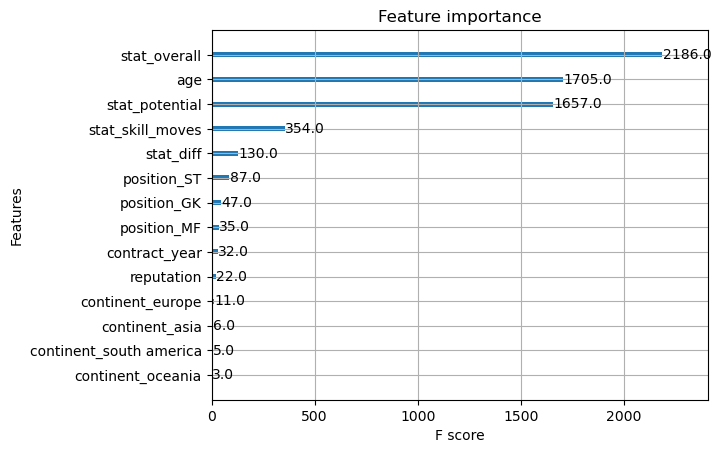

In [250]:
xgboost.plot_importance(xgb_model)

### 제출해보기

In [201]:
y_val = xgb_model.fit(X_train, y_train).predict(X_test)
y_val[:5]

array([17.353548, 17.657934, 17.647299, 17.64685 , 17.64013 ],
      dtype=float32)

In [202]:
np.exp(y_val)

array([34399344.   , 46638372.   , 46144984.   , ...,    60588.88 ,
          56161.594,    56161.594], dtype=float32)

In [203]:
submit["value"] = np.exp(y_val)
submit["value"]

0      34399344.00000
1      46638372.00000
2      46144984.00000
3      46124304.00000
4      45815320.00000
            ...      
3823      60202.80078
3824      59999.54688
3825      60588.87891
3826      56161.59375
3827      56161.59375
Name: value, Length: 3828, dtype: float32

In [206]:
submit.to_csv(f"Data/FIFA/submit_{rmse}.csv", index=False)

In [207]:
pd.read_csv(f"Data/FIFA/submit_{rmse}.csv")

,id,value
0,1,34399344.00000
1,2,46638372.00000
2,4,46144984.00000
3,5,46124304.00000
4,6,45815320.00000
...,...,...
3823,16924,60202.80000
3824,16929,59999.54700
3825,16932,60588.88000
3826,16937,56161.59400


# LinearRegression

In [210]:
from sklearn.linear_model import LinearRegression

l_model = LinearRegression(n_jobs=-1, positive=True)
l_model

LinearRegression(n_jobs=-1, positive=True)

In [211]:
y_valid = cross_val_predict(l_model, X_train, y_train, n_jobs=-1, cv=5)
y_valid[:5]

array([19.13992069, 18.10940196, 18.41047097, 18.23530835, 17.98431967])

In [212]:
rmse = mean_squared_error(y_train, y_valid)**0.5
rmse

0.37082274620963085

### 제출해보기

In [213]:
y_valid = l_model.fit(X_train, y_train).predict(X_test)
y_valid[:5]

array([19.66917717, 19.28068824, 18.94707316, 18.86177527, 18.80772345])

In [214]:
np.exp(y_valid)

array([3.48509893e+08, 2.36317841e+08, 1.69281431e+08, ...,
       3.69713176e+04, 2.59313162e+04, 2.52519987e+04])

In [216]:
submit["value"] = np.exp(y_valid)

In [217]:
submit.to_csv(f"Data/FIFA/submit_{rmse}.csv", index=False)
pd.read_csv(f"Data/FIFA/submit_{rmse}.csv")

,id,value
0,1,348509892.53097
1,2,236317840.76002
2,4,169281431.12779
3,5,155440762.96774
4,6,147261937.63152
...,...,...
3823,16924,33402.94593
3824,16929,27638.21386
3825,16932,36971.31763
3826,16937,25931.31620


# ExtraTrees model

In [242]:
from sklearn.ensemble import ExtraTreesRegressor

etr_model = ExtraTreesRegressor(random_state=42, n_jobs=-1, max_depth=18, max_features=0.85)
etr_model

ExtraTreesRegressor(max_depth=18, max_features=0.85, n_jobs=-1, random_state=42)

In [243]:
y_valid = cross_val_predict(etr_model, X_train, y_train, n_jobs=-1, cv=5)
y_valid[:5]

array([15.2491148 , 15.12543323, 15.24719329, 15.02999638, 15.17472374])

In [244]:
rmse = mean_squared_error(y_train, y_valid)**0.5
rmse

0.5777144888346083

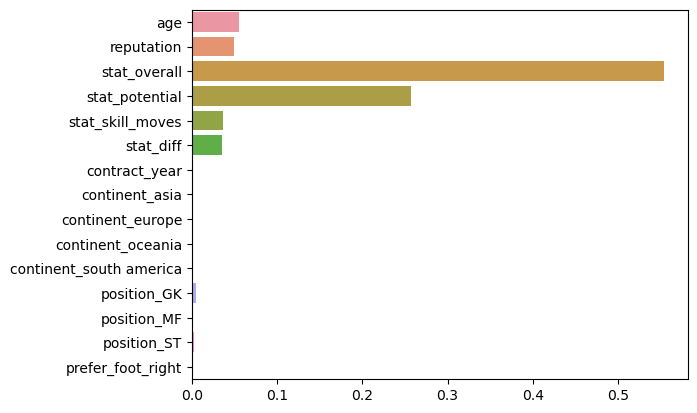

In [253]:
_ = sns.barplot(x=etr_model.feature_importances_, y = etr_model.feature_names_in_)

### 제출해보기

In [245]:
y_pred = etr_model.fit(X_train, y_train).predict(X_test)
y_pred[:5]

array([17.99327055, 18.25414618, 17.98637832, 18.01159048, 17.85813414])

In [246]:
np.exp(y_pred)

array([6.52195969e+07, 8.46593557e+07, 6.47716343e+07, ...,
       5.62274562e+04, 5.13929240e+04, 5.30750273e+04])

In [247]:
submit["value"] = np.exp(y_pred)
submit

,id,value
0,1,65219596.91323
1,2,84659355.67381
2,4,64771634.32630
3,5,66425426.80876
4,6,56975627.34390
...,...,...
3823,16924,58362.16326
3824,16929,49262.96429
3825,16932,56227.45621
3826,16937,51392.92395


In [248]:
submit.to_csv(f"Data/FIFA/submit_{rmse}.csv", index=False)
pd.read_csv(f"Data/FIFA/submit_{rmse}.csv")

,id,value
0,1,65219596.91323
1,2,84659355.67381
2,4,64771634.32630
3,5,66425426.80876
4,6,56975627.34390
...,...,...
3823,16924,58362.16326
3824,16929,49262.96429
3825,16932,56227.45621
3826,16937,51392.92395


# Ridge CV &Rasso CV

In [255]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [259]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [271]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge

[0.30802406068408034,
 0.30802339594287054,
 0.3080207385162126,
 0.30801145677534586,
 0.3079850993170711,
 0.3079589743767709,
 0.3078946268848594,
 0.307831575394942,
 0.30764945390886134,
 0.30742125763224676,
 0.30715677524236856]

Text(0, 0.5, 'rmse')

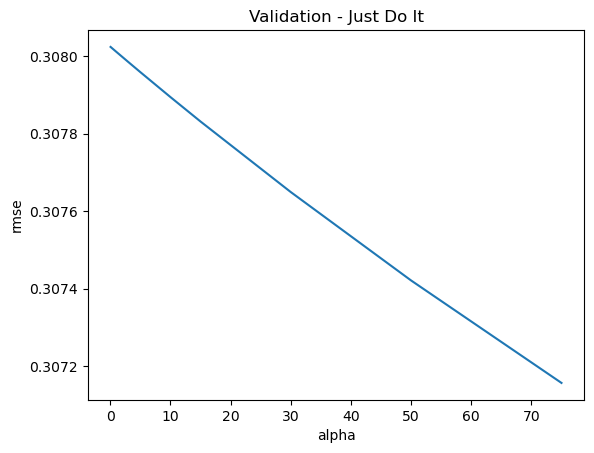

In [272]:
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [273]:
cv_ridge.min()

0.30715677524236856

In [293]:
model_ridge = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y_train)
ridge_score = rmse_cv(model_ridge).mean()
ridge_score

0.308069595047355

In [294]:
model_lasso = LassoCV(alphas=[50, 10, 5, 3, 1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
lasso_score = rmse_cv(model_lasso).mean()
lasso_score

0.3133455995213826

Text(0.5, 1.0, 'Coefficiens in the Ridge Model')

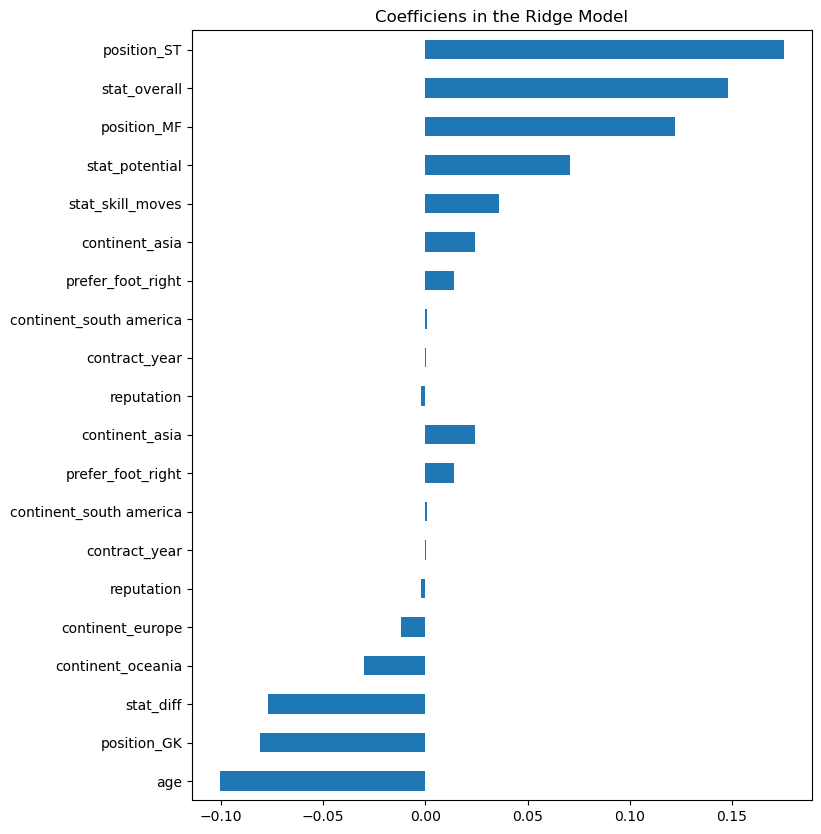

In [285]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
plt.figure(figsize=(8,10))
imp_coef.plot(kind="barh")
plt.title("Coefficiens in the Ridge Model")

Text(0.5, 1.0, 'Coefficiens in the Lasso Model')

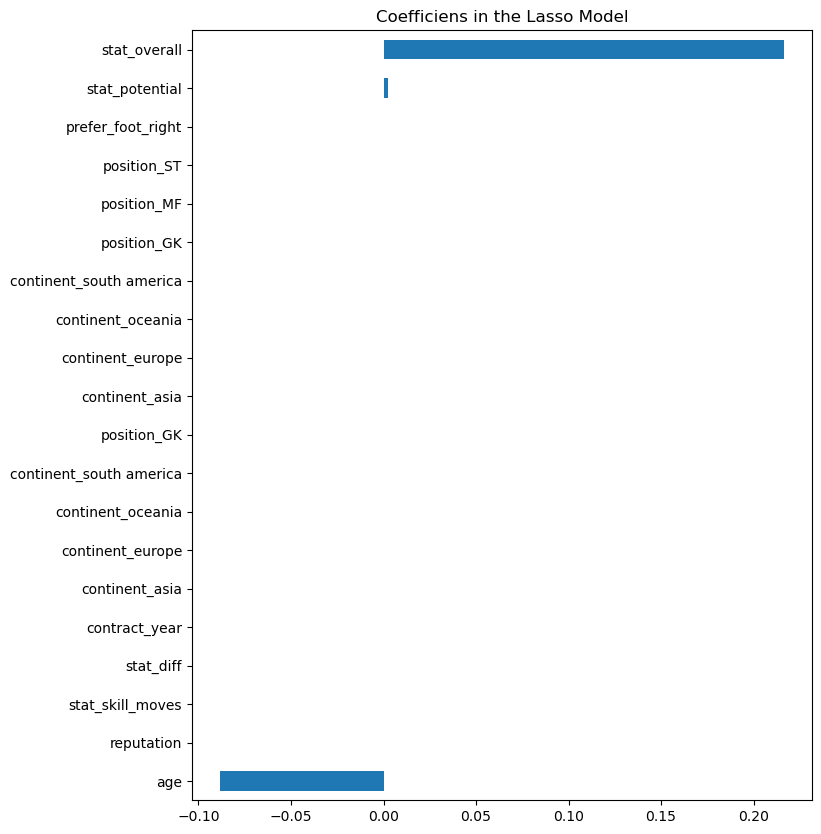

In [284]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
plt.figure(figsize=(8,10))
imp_coef.plot(kind="barh")
plt.title("Coefficiens in the Lasso Model")

In [286]:
y_ridge = model_ridge.predict(X_test)
y_ridge[:5]

array([19.1177218 , 19.38897409, 18.97029725, 19.02793105, 18.47327055])

In [288]:
y_rasso = model_lasso.predict(X_test)
y_rasso[:5]

array([18.97869125, 19.16163003, 18.8546883 , 18.8523154 , 18.41095467])

### 제출하기

- ridge model

In [290]:
np.exp(y_ridge)

array([2.00780293e+08, 2.63344623e+08, 1.73258845e+08, ...,
       3.00916376e+04, 2.56352403e+04, 2.28201896e+04])

In [292]:
submit["value"] = np.exp(y_ridge)
submit

,id,value
0,1,200780293.02611
1,2,263344623.40669
2,4,173258845.41056
3,5,183537772.63698
4,6,105399721.02466
...,...,...
3823,16924,25529.36165
3824,16929,23347.44875
3825,16932,30091.63755
3826,16937,25635.24027


In [295]:
submit.to_csv(f"Data/FIFA/submit_{ridge_score}.csv", index=False)
pd.read_csv(f"Data/FIFA/submit_{ridge_score}.csv")

,id,value
0,1,200780293.02611
1,2,263344623.40669
2,4,173258845.41056
3,5,183537772.63698
4,6,105399721.02466
...,...,...
3823,16924,25529.36165
3824,16929,23347.44875
3825,16932,30091.63755
3826,16937,25635.24027


- rasso model

In [296]:
np.exp(y_rasso)

array([1.74719302e+08, 2.09792609e+08, 1.54343053e+08, ...,
       2.92698196e+04, 2.33540090e+04, 2.13808683e+04])

In [297]:
submit["value"] = np.exp(y_rasso)
submit

,id,value
0,1,174719301.78724
1,2,209792609.27753
2,4,154343053.46180
3,5,153977247.14935
4,6,99032107.25100
...,...,...
3823,16924,24416.68830
3824,16929,29269.81958
3825,16932,29269.81958
3826,16937,23354.00904


In [298]:
submit.to_csv(f"Data/FIFA/submit_{lasso_score}.csv", index=False)
pd.read_csv(f"Data/FIFA/submit_{lasso_score}.csv")

,id,value
0,1,174719301.78724
1,2,209792609.27753
2,4,154343053.46180
3,5,153977247.14935
4,6,99032107.25100
...,...,...
3823,16924,24416.68830
3824,16929,29269.81958
3825,16932,29269.81958
3826,16937,23354.00904


# 여러가지 비교

In [309]:
import warnings
warnings.filterwarnings("ignore")

In [300]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)

In [306]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_percentage_error, 
                             mean_absolute_error, 
                             mean_squared_log_error)
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [329]:
test_size = 0.2
random_state = 42
X_tr, X_te, y_tr, y_te = train_test_split(
    X_train, y_train, test_size=test_size, random_state=random_state
)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((7145, 15), (1787, 15), (7145,), (1787,))

In [332]:
def train_pipeline(pipe):

    scaler = pipe.steps[0][1].__class__.__name__
    regressor = pipe.steps[1][1].__class__.__name__
    if scaler == "NoneType":
        scaler = "Without Scaling"

    # Fitting Model
    pipe.fit(X_tr, y_tr)

    # Get Predictions
    y_pred = pipe.predict(X_te)
    y_test_exp = np.expm1(y_te)
    y_pred_exp = np.expm1(y_pred)

    # Model Evaluation
    r2 = r2_score(y_test_exp, y_pred_exp)
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    rmse = mean_squared_error(y_test_exp, y_pred_exp, squared=False)
    msle = mean_squared_log_error(y_test_exp, y_pred_exp)
    mape = mean_absolute_percentage_error(y_test_exp, y_pred_exp)
    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    return scaler, regressor, r2, mse, rmse, msle, mape, mae


regressors = [
    KNeighborsRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    XGBRegressor(),
    LGBMRegressor(),
    AdaBoostRegressor(),
    SVR(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
]

scalers = [None, StandardScaler(), RobustScaler()]
eval_data = pd.DataFrame(
    {
        "model": [],
        "scaler": [],
        "r2": [],
        "mse": [],
        "rmse": [],
        "msle": [],
        "mape": [],
        "mae": [],
    }
)

for reg in regressors:
    for sc in scalers:
        pipeline = Pipeline([("scaler", sc), ("reg", reg)])
        scalar, regressor, r2, mse, rmse, msle, mape, mae = train_pipeline(
            pipeline
        )
        eval_data = eval_data.append(
            pd.DataFrame(
                {
                    "model": [regressor],
                    "scaler": [scalar],
                    "r2": [r2],
                    "mse": [mse],
                    "rmse": [rmse],
                    "msle": [msle],
                    "mape": [mape],
                    "mae": [mae],
                }
            )
        )
        evel_data = eval_data.reset_index(drop=True)

eval_data.sort_values("rmse")

,model,scaler,r2,mse,rmse,msle,mape,mae
0,XGBRegressor,RobustScaler,0.97864,965821651083.61487,982762.25563,0.00653,0.04584,166914.81607
0,XGBRegressor,Without Scaling,0.97864,965821654390.74121,982762.25731,0.00653,0.04583,166914.60561
0,XGBRegressor,StandardScaler,0.97862,966829943083.94250,983275.11058,0.00653,0.04581,167133.13390
0,LGBMRegressor,RobustScaler,0.96704,1490351158366.19287,1220799.39317,0.00832,0.04931,166472.90444
0,LGBMRegressor,Without Scaling,0.96704,1490351158366.19287,1220799.39317,0.00832,0.04931,166472.90444
0,LGBMRegressor,StandardScaler,0.96614,1530904694623.45166,1237297.33477,0.00874,0.05225,169822.97769
0,DecisionTreeRegressor,StandardScaler,0.96204,1716042582888.06006,1309978.08489,0.01892,0.06467,245143.12501
0,RandomForestRegressor,StandardScaler,0.96200,1717871220697.55298,1310675.86409,0.01045,0.05690,213739.24908
0,DecisionTreeRegressor,Without Scaling,0.95960,1826540262131.01587,1351495.56497,0.01883,0.06502,256545.83689
0,RandomForestRegressor,RobustScaler,0.95880,1862919739562.50024,1364888.17841,0.01019,0.05623,215809.94605


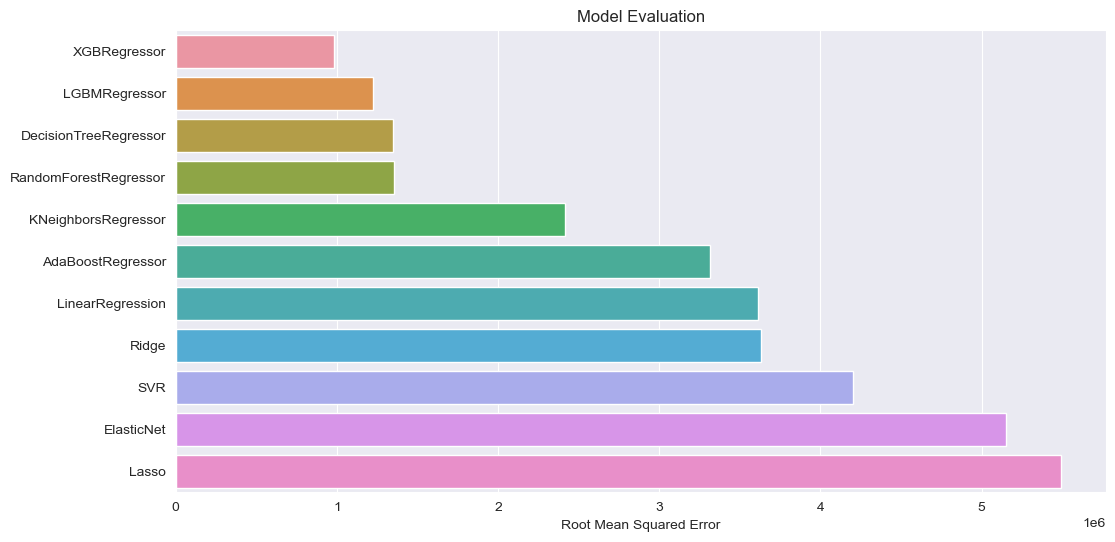

In [333]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title("Model Evaluation", size=12)
sns.barplot(errorbar=None,
    data=eval_data,
    y="model",
    x="rmse",
    order=eval_data.groupby("model")
    .agg({"rmse": "mean"})
    .reset_index()
    .sort_values("rmse")
    .model,
)
plt.ylabel("")
plt.xlabel("Root Mean Squared Error", size=10)
plt.show()

### Pipeline( XGBRegressor())

In [318]:
ro_x_pipe = Pipeline([("scaler", RobustScaler()), ("reg", XGBRegressor())])
y_pre_rx = ro_x_pipe.fit(X_train, y_train).predict(X_test)
y_pre_rx[:5]

array([17.862183, 18.390553, 18.217743, 18.289093, 18.079422],
      dtype=float32)

### 제출하기
- Pipeline([("scaler", RobustScaler()), ("reg", XGBRegressor())])

In [319]:
np.exp(y_pre_rx)

array([5.7206760e+07, 9.7032112e+07, 8.1632896e+07, ..., 5.8769516e+04,
       5.1222395e+04, 5.0976148e+04], dtype=float32)

In [321]:
submit["value"] = np.exp(y_pre_rx)
submit

,id,value
0,1,57206760.00000
1,2,97032112.00000
2,4,81632896.00000
3,5,87670232.00000
4,6,71087496.00000
...,...,...
3823,16924,59414.99609
3824,16929,50464.01172
3825,16932,58769.51562
3826,16937,51222.39453


In [322]:
submit.to_csv("Data/FIFA/submit_982762.25563.csv", index=False)
pd.read_csv("Data/FIFA/submit_982762.25563.csv")

,id,value
0,1,57206760.00000
1,2,97032110.00000
2,4,81632900.00000
3,5,87670230.00000
4,6,71087496.00000
...,...,...
3823,16924,59414.99600
3824,16929,50464.01000
3825,16932,58769.51600
3826,16937,51222.39500


### Pipeline( LGBMRegressor())

In [323]:
ro_lg_pipe = Pipeline([("scaler", RobustScaler()), ("reg", LGBMRegressor())])
y_pre_rlg = ro_lg_pipe.fit(X_train, y_train).predict(X_test)
y_pre_rlg[:5]

array([17.55620603, 18.15311853, 18.10823725, 18.15107991, 17.92985849])

### 제출하기
- Pipeline([("scaler", RobustScaler()), ("reg", LGBMRegressor())])

In [324]:
np.exp(y_pre_rlg)

array([4.21272783e+07, 7.65242722e+07, 7.31656970e+07, ...,
       5.71420092e+04, 5.16498965e+04, 5.13627540e+04])

In [326]:
submit["value"] = np.exp(y_pre_rlg)
submit

,id,value
0,1,42127278.25025
1,2,76524272.17276
2,4,73165697.02589
3,5,76368426.94747
4,6,61212286.94522
...,...,...
3823,16924,61349.34631
3824,16929,48572.90782
3825,16932,57142.00924
3826,16937,51649.89653


In [327]:
submit.to_csv("Data/FIFA/submit_1220799.39317.csv", index=False)
pd.read_csv("Data/FIFA/submit_1220799.39317.csv")

,id,value
0,1,42127278.25025
1,2,76524272.17276
2,4,73165697.02589
3,5,76368426.94747
4,6,61212286.94522
...,...,...
3823,16924,61349.34631
3824,16929,48572.90782
3825,16932,57142.00924
3826,16937,51649.89653
